In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np

# Import our input dataset
df = pd.read_csv('outliers_removed.csv')
df

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10
4516,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4
4517,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12
4518,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24


In [3]:
# create log transformed column for salary
df['sal-log']=np.log10(df['Salary'])
df

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started,sal-log
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33,5.267172
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7,5.000000
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3,5.000000
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31,5.477121
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10,5.724276
4516,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4,6.414973
4517,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12,5.707996
4518,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24,5.711385


In [4]:
df= df.drop(["Full Name","Team","League","Age","Earned Runs","Home Runs","Wins","Losses","Weight","Height","Year","Salary"],1)
df.head()

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,ERA,Hits,Strike Outs,Outs Pitched,Batters Faced by Pitcher,Games Finished,Games Started,sal-log
0,4.51,246,105,635,925,0,33,5.267172
1,5.97,37,25,104,162,0,7,5.000000
2,3.77,13,7,43,63,0,3,5.000000
3,4.53,214,82,566,797,0,31,5.477121
4,2.76,179,127,557,784,1,24,5.000000


In [5]:
# Split our preprocessed data into our features and target arrays
y = df["sal-log"].values
X = df.drop(["sal-log"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 21
hidden_nodes_layer2 = 21
hidden_nodes_layer3 = 7


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                168       
                                                                 
 dense_1 (Dense)             (None, 21)                462       
                                                                 
 dense_2 (Dense)             (None, 7)                 154       
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 792
Trainable params: 792
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

36/36 - 0s - loss: 2.2151 - mse: 2.2151 - 99ms/epoch - 3ms/step
Loss: 2.2150962352752686, Accuracy: 2.2150962352752686


<AxesSubplot:>

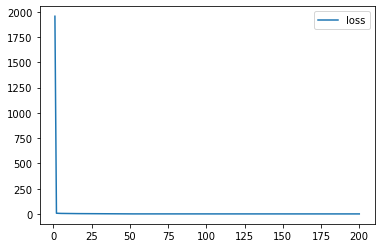

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

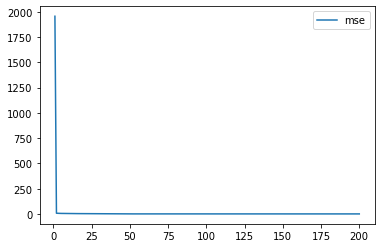

In [13]:
# Plot the accuracy
history_df.plot(y="mse")